In [31]:
import pandas as pd
import numpy as np
import pickle
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [20]:
X_train = pd.read_pickle("../data/HR_Xtrain_30proc.pkl")
X_test = pd.read_pickle("../data/HR_Xtest_30proc.pkl")
y_train = pd.read_pickle("../data/HR_Ytrain_30proc.pkl")
y_test = pd.read_pickle("../data/HR_Ytest_30proc.pkl")
HR_Full = pd.read_pickle("../data/HR_OneHotEnco.pkl")

In [5]:
features = X_train.columns.tolist()

In [6]:
logreg = linear_model.LinearRegression()
logreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
preds = logreg.predict(X_test)

In [8]:
preds = preds.astype(int)

In [26]:
print("R^2: %.2f" % metrics.r2_score(y_test, preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, preds))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, preds)) 
print("Mean squared log error: %.2f" % metrics.mean_squared_log_error(y_test, preds))

R^2: 0.32
Mean squared error: 0.12
Mean absolute error: 0.12
Mean squared log error: 0.06


In [27]:
#Classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3462
           1       1.00      0.48      0.65      1038

    accuracy                           0.88      4500
   macro avg       0.93      0.74      0.79      4500
weighted avg       0.90      0.88      0.86      4500



In [15]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
rocScore = roc_auc_score(y_test, preds)

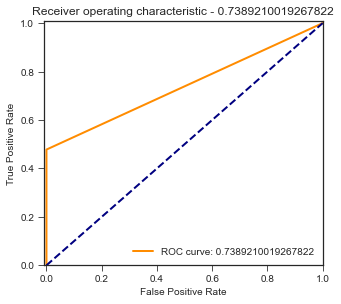

In [18]:
fig, ax = plt.subplots(figsize=(5,4.5))
lw = 2

ax.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve: {rocScore}')

ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f'Receiver operating characteristic - {rocScore}')
ax.legend(loc="lower right")
plt.show()

In [32]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

average_precision = average_precision_score(y_test, preds)
average_precision = round(average_precision, 2)

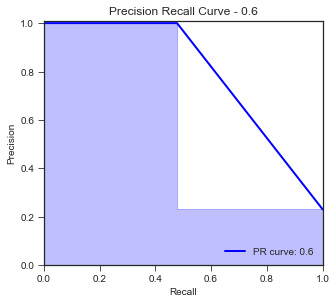

In [33]:
fig, ax = plt.subplots(figsize=(5,4.5))

# Grubość krzywej
lw = 2

# Rysujemy krzywą ROC
ax.plot(recall, precision, color='b', lw=lw, label=f'PR curve: {average_precision}')

# Rysujemy krzywą 45 stopni jako punkt odniesienia
ax.fill_between(recall, precision, step='post', alpha=0.25, color='b')

# Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title(f'Precision Recall Curve - {average_precision}')
ax.legend(loc="lower right")
plt.show()

In [ ]:
# check model on full data 

In [ ]:
preds_fulldata = logreg.predict(HR_Full[features])
preds_fulldata = preds_fulldata.astype(int)

In [ ]:
print("R^2: %.2f" % metrics.r2_score(HR_Full.left, preds_fulldata))
print("Mean squared error: %.2f" % metrics.mean_squared_error(HR_Full.left, preds_fulldata))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(HR_Full.left, preds_fulldata)) 
print("Mean squared log error: %.2f" % metrics.mean_squared_log_error(HR_Full.left, preds_fulldata))

In [28]:
print(classification_report(HR_Full.left, preds_fulldata))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     11428
           1       1.00      0.47      0.64      3571

    accuracy                           0.87     14999
   macro avg       0.93      0.73      0.78     14999
weighted avg       0.89      0.87      0.86     14999



In [29]:
fpr, tpr, thresholds = roc_curve(HR_Full.left, preds_fulldata)
rocScore = roc_auc_score(HR_Full.left, preds_fulldata)

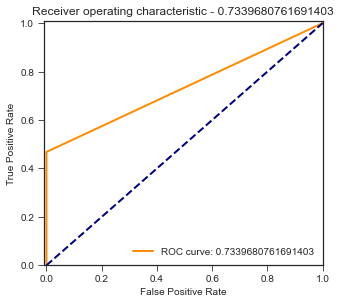

In [30]:
fig, ax = plt.subplots(figsize=(5,4.5))
lw = 2

ax.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve: {rocScore}')

ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f'Receiver operating characteristic - {rocScore}')
ax.legend(loc="lower right")
plt.show()

In [34]:
precision, recall, thresholds = precision_recall_curve(HR_Full.left, preds_fulldata)

average_precision = average_precision_score(HR_Full.left, preds_fulldata)
average_precision = round(average_precision, 2)

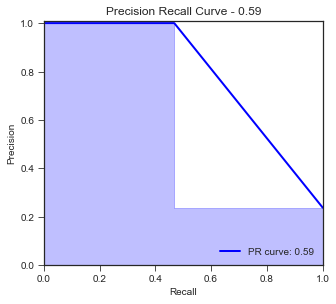

In [35]:
fig, ax = plt.subplots(figsize=(5,4.5))

# Grubość krzywej
lw = 2

# Rysujemy krzywą ROC
ax.plot(recall, precision, color='b', lw=lw, label=f'PR curve: {average_precision}')

# Rysujemy krzywą 45 stopni jako punkt odniesienia
ax.fill_between(recall, precision, step='post', alpha=0.25, color='b')

# Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title(f'Precision Recall Curve - {average_precision}')
ax.legend(loc="lower right")
plt.show()

In [ ]:
# try to remove values that are highly corelated 

In [36]:
from pandas_profiling import ProfileReport
HR_profiler_report = ProfileReport(HR_Full, title = "HR Project After OHE", infer_dtypes=True, explorative = True)

In [37]:
HR_profiler_report.to_file("../reports/HR_EDA_OHE.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]